# 設定目錄路徑&查看資料集數量

In [1]:
import os, shutil

train_dir = "C:/Users/1907075/Project/OM_train"
validation_dir = "C:/Users/1907075/Project/OM_validation"
test_dir = "C:/Users/1907075/Project/OM_test"
train_NG_dir = "C:/Users/1907075/Project/OM_train/1"
train_OK_dir = "C:/Users/1907075/Project/OM_train/2"
validation_NG_dir = "C:/Users/1907075/Project/OM_validation/1"
validation_OK_dir = "C:/Users/1907075/Project/OM_validation/2"
test_NG_dir = "C:/Users/1907075/Project/OM_test/1"
test_OK_dir = "C:/Users/1907075/Project/OM_test/2"

print("data counts:")
print("training_NG", len(os.listdir(train_NG_dir)))
print("training_OK", len(os.listdir(train_OK_dir)))
print("validation_NG", len(os.listdir(validation_NG_dir)))
print("validation_OK", len(os.listdir(validation_OK_dir)))
print("test_NG", len(os.listdir(test_NG_dir)))
print("test_OK", len(os.listdir(test_OK_dir)))

data counts:
training_NG 724
training_OK 824
validation_NG 300
validation_OK 300
test_NG 22
test_OK 23


# 建立CNN Model

In [27]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(640, 480, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 638, 478, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 319, 239, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 317, 237, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 158, 118, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 156, 116, 128)     73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 78, 58, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 76, 56, 128)       147584    
__________

# 配置Model

In [28]:
from keras import optimizers

# 損失函數：'binary_crossentropy' 用於二元分類
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

# 讀取圖片檔案並壓縮

In [29]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) # 將圖片像素值依1/255比例壓至0~1之間
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(640, 480),
    batch_size=10,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(640, 480),
    batch_size=10,
    class_mode='binary')

Found 1548 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


# 訓練模型並儲存

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50)

model.save('OM_Check.h5')

Epoch 1/30


# 顯示訓練和驗證週期的損失值和準確度曲線

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Data Augmentation (二次Data Augmentation?)

In [3]:
# 透過產生器Image Data Generator設定資料擴增
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

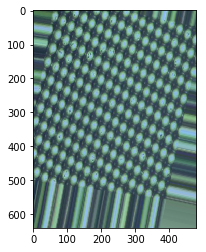

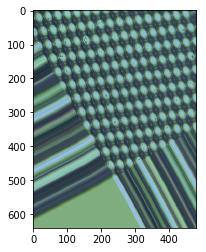

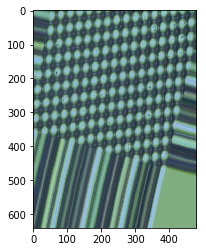

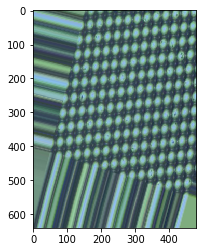

In [16]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(train_NG_dir, fname) for fname in os.listdir(train_NG_dir)]

img_path = fnames[10]
img = image.load_img(img_path, target_size=(640,480))
x = image.img_to_array(img) # 將圖片轉換成 shape = (640,480,3) 的 Numpy 矩陣
x = x.reshape((1, ) + x.shape) # 調整 shape = (1, 640, 480, 3)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

# 定義具有Dropout層的新卷積神經網路

In [25]:
# 設定路徑
import os, shutil

train_dir = "C:/Users/1907075/Project/OM_train"
validation_dir = "C:/Users/1907075/Project/OM_validation"
test_dir = "C:/Users/1907075/Project/OM_test"
train_NG_dir = "C:/Users/1907075/Project/OM_train/1"
train_OK_dir = "C:/Users/1907075/Project/OM_train/2"
validation_NG_dir = "C:/Users/1907075/Project/OM_validation/1"
validation_OK_dir = "C:/Users/1907075/Project/OM_validation/2"
test_NG_dir = "C:/Users/1907075/Project/OM_test/1"
test_OK_dir = "C:/Users/1907075/Project/OM_test/2"

print("data counts:")
print("training_NG", len(os.listdir(train_NG_dir)))
print("training_OK", len(os.listdir(train_OK_dir)))
print("validation_NG", len(os.listdir(validation_NG_dir)))
print("validation_OK", len(os.listdir(validation_OK_dir)))
print("test_NG", len(os.listdir(test_NG_dir)))
print("test_OK", len(os.listdir(test_OK_dir)))

data counts:
training_NG 724
training_OK 824
validation_NG 300
validation_OK 300
test_NG 22
test_OK 23


In [26]:
# 建立模型

from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(640,480,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # dropout rate 50%
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 638, 478, 32)      896       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 319, 239, 32)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 317, 237, 64)      18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 158, 118, 64)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 156, 116, 128)     73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 78, 58, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 76, 56, 128)       147584    
__________

In [29]:
# 加入資料擴增器
from keras.preprocessing import image

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(640,480),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(640,480),
    batch_size=32,
    class_mode='binary')

Found 1548 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
# 訓練模型

history = model.fit_generator(
    train_generator,
    step_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_step=50)

model.save('OM_Check_WithDropoutAndDataAugmentation.h5')

In [ ]:
# 顯示訓練和驗證週期的損失值和準確度曲線

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()